
# 📊 Preparación de Datos para Machine Learning  
## Módulo 2

En este módulo aprenderás a:

- Cargar y explorar un dataset con Pandas  
- Identificar tipos de variables  
- Detectar y manejar valores faltantes  
- Eliminar duplicados  
- Visualizar relaciones entre variables  
- Dividir datos en entrenamiento y prueba  

> En proyectos reales de Machine Learning, la mayor parte del trabajo es preparar y entender los datos.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



## 1. ¿Qué es un dataset?

Un dataset es una tabla compuesta por:

- **Filas** → observaciones (por ejemplo: días, productos, sensores)
- **Columnas** → variables o características (features)

En este módulo trabajaremos con un ejemplo sencillo:

**Número de clientes que visitan una tienda**  
vs  
**Ventas diarias en dólares**


In [2]:

data = {
    "Clientes_Visitantes": [10, 20, 30, 35, 40, 50, 55, 60, 70, 80, 90, 100],
    "Ventas_Diarias":      [200, 250, 270, 300, 320, 400, 420, 450, 500, 550, 600, 650]
}

df = pd.DataFrame(data)
df


,Clientes_Visitantes,Ventas_Diarias
0,10,200
1,20,250
2,30,270
3,35,300
4,40,320
5,50,400
6,55,420
7,60,450
8,70,500
9,80,550



## 2. Exploración inicial del dataset


In [3]:

print("Dimensiones del dataset:", df.shape)
print("\nInformación general:")
df.info()

print("\nEstadísticas descriptivas:")
df.describe()


Dimensiones del dataset: (12, 2)

Información general:
<class 'pandas.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Clientes_Visitantes  12 non-null     int64
 1   Ventas_Diarias       12 non-null     int64
dtypes: int64(2)
memory usage: 324.0 bytes

Estadísticas descriptivas:


,Clientes_Visitantes,Ventas_Diarias
count,12.000000,12.000000
mean,53.333333,409.166667
std,27.988093,145.443418
min,10.000000,200.000000
25%,33.750000,292.500000
50%,52.500000,410.000000
75%,72.500000,512.500000
max,100.000000,650.000000



## 3. Visualización básica


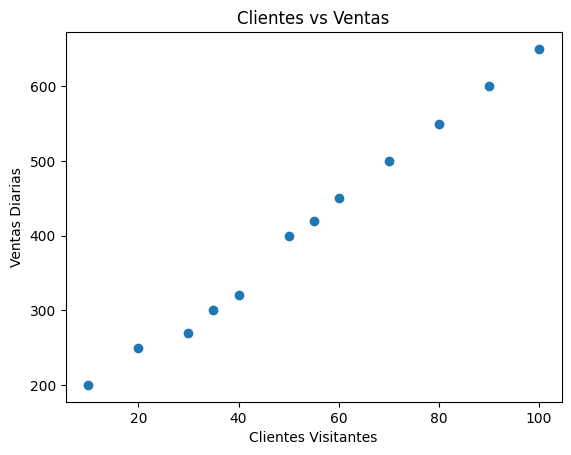

In [4]:

plt.figure()
plt.scatter(df["Clientes_Visitantes"], df["Ventas_Diarias"])
plt.xlabel("Clientes Visitantes")
plt.ylabel("Ventas Diarias")
plt.title("Clientes vs Ventas")
plt.show()



## 4. Manejo de valores faltantes


In [5]:

df_missing = df.copy()
df_missing.loc[3, "Ventas_Diarias"] = np.nan
df_missing.loc[8, "Clientes_Visitantes"] = np.nan

df_missing


,Clientes_Visitantes,Ventas_Diarias
0,10.0,200.0
1,20.0,250.0
2,30.0,270.0
3,35.0,NaN
4,40.0,320.0
5,50.0,400.0
6,55.0,420.0
7,60.0,450.0
8,NaN,500.0
9,80.0,550.0


In [6]:

print("Valores faltantes por columna:")
df_missing.isna().sum()


Valores faltantes por columna:


Clientes_Visitantes    1
Ventas_Diarias         1
dtype: int64


### Opciones para manejar valores faltantes:
1. Eliminar filas con NaN  
2. Rellenar con promedio (media)


In [7]:

df_drop = df_missing.dropna()
df_fill = df_missing.fillna(df_missing.mean())

print("Después de eliminar filas:")
print(df_drop)

print("\nDespués de rellenar con promedio:")
print(df_fill)


Después de eliminar filas:
    Clientes_Visitantes  Ventas_Diarias
0                  10.0           200.0
1                  20.0           250.0
2                  30.0           270.0
4                  40.0           320.0
5                  50.0           400.0
6                  55.0           420.0
7                  60.0           450.0
9                  80.0           550.0
10                 90.0           600.0
11                100.0           650.0

Después de rellenar con promedio:
    Clientes_Visitantes  Ventas_Diarias
0             10.000000      200.000000
1             20.000000      250.000000
2             30.000000      270.000000
3             35.000000      419.090909
4             40.000000      320.000000
5             50.000000      400.000000
6             55.000000      420.000000
7             60.000000      450.000000
8             51.818182      500.000000
9             80.000000      550.000000
10            90.000000      600.000000
11           100.0


## 5. Eliminar duplicados


In [8]:

df_duplicate = pd.concat([df, df.iloc[[2]]], ignore_index=True)
print("Antes de eliminar duplicados:", df_duplicate.shape)

df_unique = df_duplicate.drop_duplicates()
print("Después de eliminar duplicados:", df_unique.shape)


Antes de eliminar duplicados: (13, 2)
Después de eliminar duplicados: (12, 2)



## 6. Separar datos en entrenamiento y prueba


In [9]:

X = df[["Clientes_Visitantes"]]
y = df["Ventas_Diarias"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)


Tamaño entrenamiento: (8, 1)
Tamaño prueba: (4, 1)



## 7. Resumen del Módulo 2

En este módulo aprendiste a:

- Explorar datasets con Pandas  
- Visualizar relaciones entre variables  
- Manejar valores faltantes  
- Eliminar duplicados  
- Dividir datos en entrenamiento y prueba  

En el siguiente módulo entrenaremos nuestro primer modelo de Machine Learning: **Regresión Lineal**.
